RAINFALL PREDICTION MODEL

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


In [ ]:
drive.mount("/content/drive")
dataset= pd.read_csv("/content/drive/My Drive/Colab Notebooks/rainfall.csv")

Mounted at /content/drive


In [ ]:
dataset.shape


(145460, 23)

In [ ]:
dataset.head(5)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
dataset.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
dataset.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
unique_counts = dataset.nunique()
print(unique_counts)

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64


In [ ]:
dataset["RainTomorrow"].describe()


count     142193
unique         2
top           No
freq      110316
Name: RainTomorrow, dtype: object

In [ ]:
dataset["RainTomorrow"].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
X=dataset.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['Uluru' 5.4 26.9 ... 12.5 26.1 'No']
 ['Uluru' 7.8 27.0 ... 15.1 26.0 'No']
 ['Uluru' 14.9 nan ... 15.0 20.9 'No']]


In [ ]:
y=dataset.iloc[:,-1].values
print(y)

['No' 'No' 'No' ... 'No' 'No' nan]


In [ ]:
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X=imputer.fit_transform(X)
y=imputer.fit_transform(y.reshape(-1,1))

In [ ]:
pd.DataFrame(X).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
dtype: int64

In [ ]:
pd.DataFrame(y).isnull().sum()

0    0
dtype: int64

In [ ]:
label1=LabelEncoder()
X[:,0]=label1.fit_transform(X[:,0])
label2=LabelEncoder()
X[:,4]=label2.fit_transform(X[:,4])
label3=LabelEncoder()
X[:,6]=label3.fit_transform(X[:,6])
label4=LabelEncoder()
X[:,7]=label4.fit_transform(X[:,7])
label5=LabelEncoder()
X[:,-1]=label5.fit_transform(X[:,-1])
label6=LabelEncoder()
y=label6.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


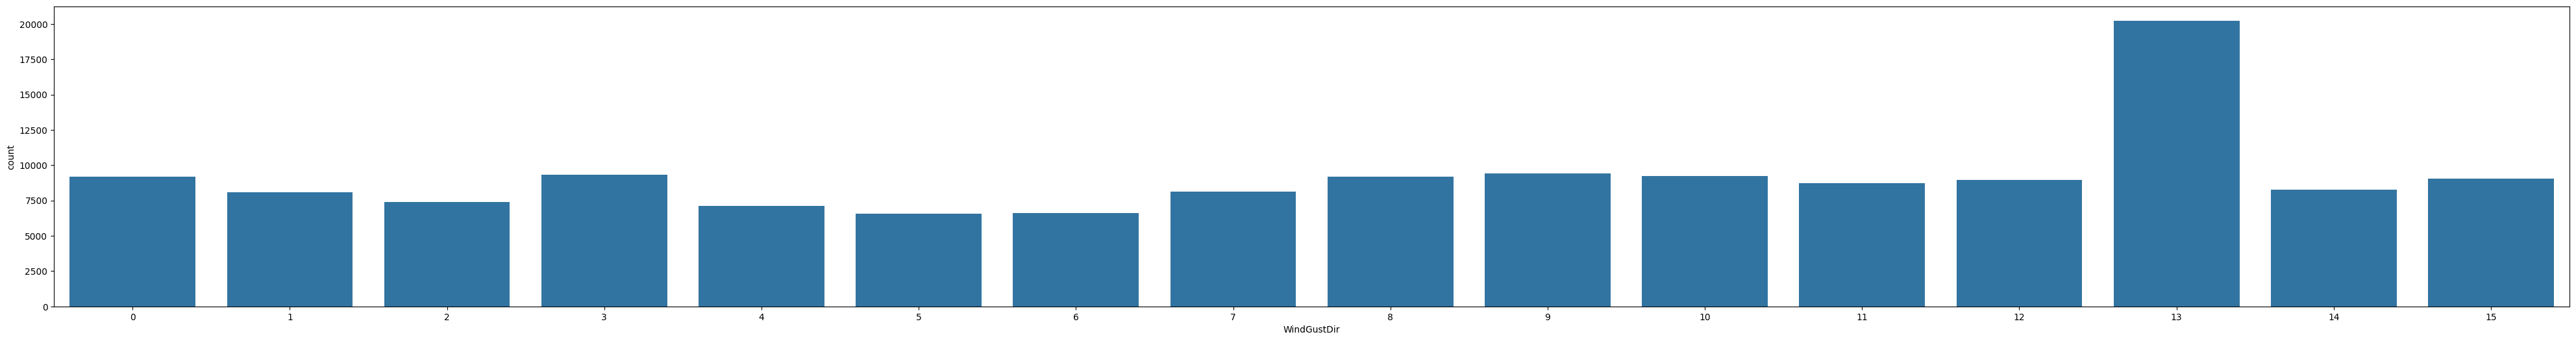

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50, 6))
sns.countplot(x="WindGustDir", data=dataset)
plt.show()

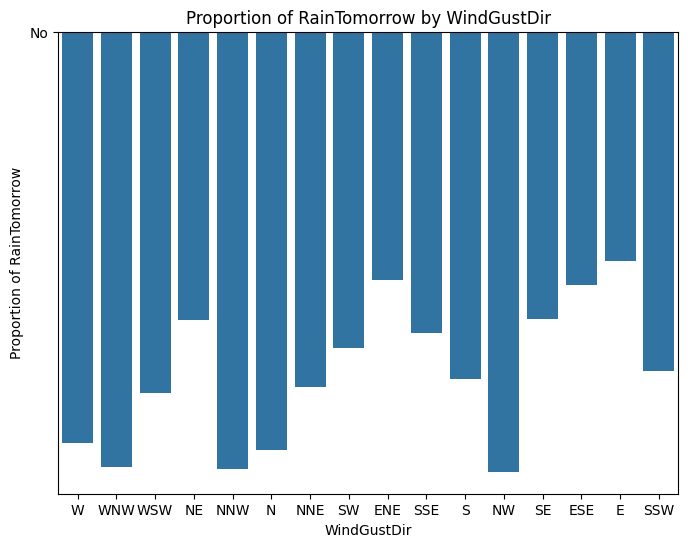

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x="WindGustDir", y="RainTomorrow", data=dataset,errorbar=None)
plt.title("Proportion of RainTomorrow by WindGustDir")
plt.xlabel("WindGustDir")
plt.ylabel("Proportion of RainTomorrow")
# plt.xticks([0,1])
plt.show()

In [ ]:
dataset=pd.DataFrame(X,columns=["Location","MinTemp","MaxTemp","Rainfall","WindGustDir","WindGustSpeed","WindDir9am","WindDir3pm","WindSpeed9am","WindSpeed3am","Humidity9am","Humidity3am","Pressure9am","Pressure3am","Cloud9am","Cloud3am","Temp9am","Temp3am","RainToday"])
dataset["RainTomorrow"]=y
dataset

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3am,Humidity9am,Humidity3am,Pressure9am,Pressure3am,Cloud9am,Cloud3am,Temp9am,Temp3am,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0
1,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0
2,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0
3,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0
4,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.4,0.0,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,0,0
145456,41,3.6,25.3,0.0,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,0,0
145457,41,5.4,26.9,0.0,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,0,0
145458,41,7.8,27.0,0.0,9,28.0,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


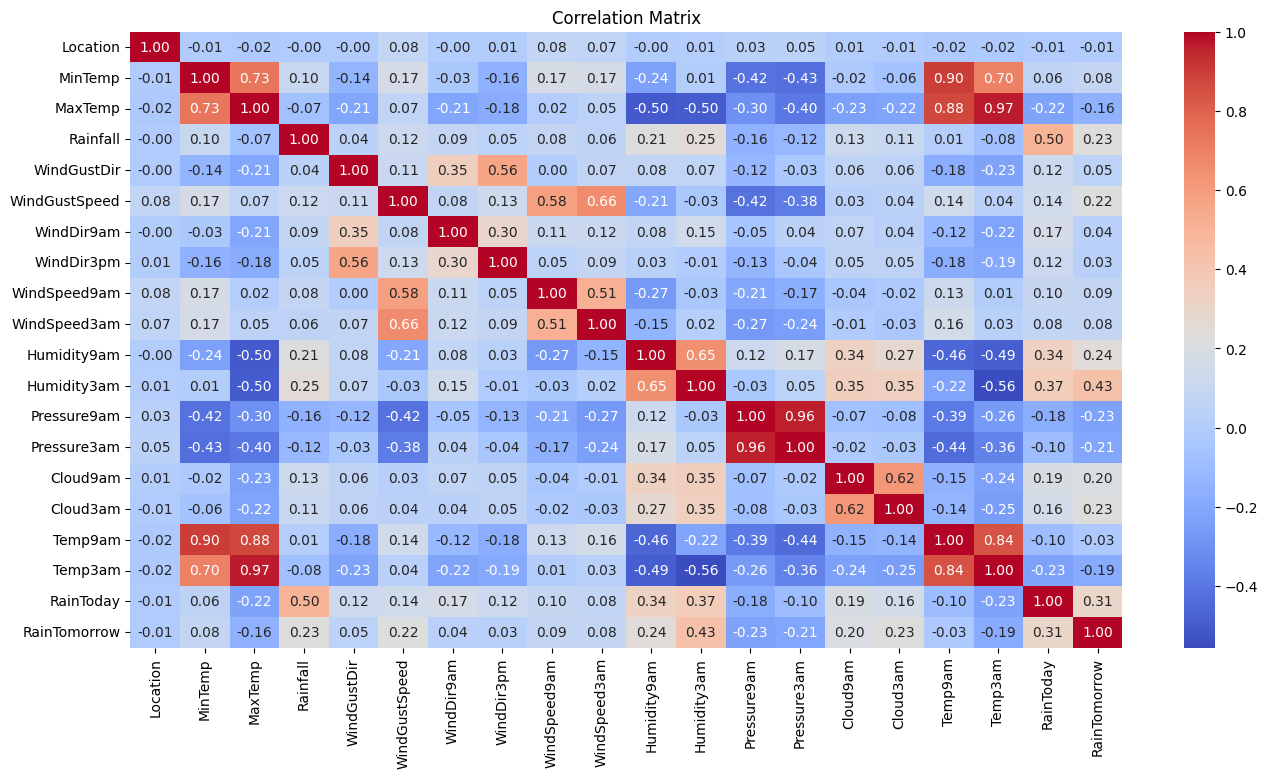

In [ ]:
# Correlation matrix
correlation_matrix = dataset.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**SUPER VECTOR MACHINE**

*WITH PYTHON PACKAGE*

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import joblib
import numpy as np

In [ ]:
# Function to load and preprocess the dataset
def load_and_preprocess_data(filepath, sample_fraction=0.01):  # Reduced sample_fraction for testing
    data = pd.read_csv(filepath)

    # Sample a fraction of the data
    data = data.sample(frac=sample_fraction, random_state=42)

    # Drop columns with too many missing values and irrelevant columns
    data = data.drop(columns=['Date', 'Location', 'Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm'])
    data = data.dropna(subset=['RainTomorrow'])

    # Fill missing values for numerical columns with median
    for column in data.select_dtypes(include=['float64', 'int64']).columns:
        data[column].fillna(data[column].median(), inplace=True)

    # Fill missing values for categorical columns with mode
    for column in data.select_dtypes(include=['object']).columns:
        data[column].fillna(data[column].mode()[0], inplace=True)

    # Encode categorical variables
    label_encoders = {}
    for column in data.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

    return data, label_encoders

# Function to train the SVM model with hyperparameter tuning
def train_svm_model(X_train, y_train):
    param_grid = {
        'C': [0.1, 1],  # Reduced parameters for testing
        'gamma': [1, 0.1],
        'kernel': ['linear', 'rbf']
    }
    grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=3, n_jobs=-1)  # Reduced cv for testing
    grid.fit(X_train, y_train)
    return grid.best_estimator_

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred_svm = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_svm)
    report = classification_report(y_test, y_pred_svm)
    confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
    return y_pred_svm, accuracy, report, confusion_matrix_svm

# Main execution for manual testing
if __name__ == "__main__":
    # Load and preprocess data with sampling
    data, label_encoders = load_and_preprocess_data("/content/drive/My Drive/Colab Notebooks/rainfall.csv", sample_fraction=0.01)

    # Split the data into features and target variable
    X = data.drop(columns=['RainTomorrow'])
    y = data['RainTomorrow']

    # Normalize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X).astype(np.float32)  # Use float32 for faster computation

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Train the SVM model with hyperparameter tuning
    best_svm_model = train_svm_model(X_train, y_train)

    # Evaluate the model's performance
    y_pred_svm, accuracy_svm, report_svm, confusion_matrix_svm = evaluate_model(best_svm_model, X_test, y_test)
    print('Prediction: ', y_pred_svm)
    print("Accuracy: {:.5f}".format(accuracy_svm))
    print("Classification Report:\n", report_svm)
    print('Confusion Matrix:\n', confusion_matrix_svm)

    # Save the trained model and other components
    joblib.dump(best_svm_model, 'best_svm_rainfall_prediction_model.pkl')
    joblib.dump(scaler, 'scaler.pkl')
    joblib.dump(label_encoders, 'label_encoders.pkl')


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Prediction:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1]
Accuracy: 0.82402
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89       277
           1       0.70      0.38      0.50      

In [ ]:
import unittest

class TestRainfallPrediction(unittest.TestCase):

    @classmethod
    def setUpClass(cls):
        # Load and preprocess data
        cls.data, cls.label_encoders = load_and_preprocess_data("/content/drive/My Drive/Colab Notebooks/rainfall.csv", sample_fraction=0.01)
        cls.X = cls.data.drop(columns=['RainTomorrow'])
        cls.y = cls.data['RainTomorrow']
        cls.scaler = StandardScaler()
        cls.X = cls.scaler.fit_transform(cls.X).astype(np.float32)
        cls.X_train, cls.X_test, cls.y_train, cls.y_test = train_test_split(cls.X, cls.y, test_size=0.25, random_state=42)

    def test_load_and_preprocess_data(self):
        self.assertIsInstance(self.data, pd.DataFrame)
        self.assertIn('RainTomorrow', self.data.columns)
        for column in self.data.select_dtypes(include=['object']).columns:
            self.assertIn(column, self.label_encoders)
        for column in self.data.select_dtypes(include=['float64', 'int64']).columns:
            self.assertFalse(self.data[column].isnull().any())

    def test_train_svm_model(self):
        model = train_svm_model(self.X_train, self.y_train)
        self.assertIsInstance(model, SVC)
        # Ensure the model is fitted by checking if it can make predictions
        y_pred = model.predict(self.X_test)
        self.assertEqual(len(y_pred), len(self.X_test))

    def test_evaluate_model(self):
        model = train_svm_model(self.X_train, self.y_train)
        y_pred, accuracy, report, confusion_matrix_result = evaluate_model(model, self.X_test, self.y_test)
        self.assertIsInstance(y_pred, np.ndarray)
        self.assertIsInstance(accuracy, float)
        self.assertIsInstance(report, str)
        self.assertIsInstance(confusion_matrix_result, np.ndarray)
        self.assertEqual(confusion_matrix_result.shape, (2, 2))

    def test_model_persistence(self):
        model = train_svm_model(self.X_train, self.y_train)
        joblib.dump(model, 'best_svm_rainfall_prediction_model.pkl')
        joblib.dump(self.scaler, 'scaler.pkl')
        joblib.dump(self.label_encoders, 'label_encoders.pkl')

        loaded_model = joblib.load('best_svm_rainfall_prediction_model.pkl')
        loaded_scaler = joblib.load('scaler.pkl')
        loaded_label_encoders = joblib.load('label_encoders.pkl')

        self.assertIsInstance(loaded_model, SVC)
        self.assertIsInstance(loaded_scaler, StandardScaler)
        self.assertEqual(loaded_label_encoders.keys(), self.label_encoders.keys())

# Run the tests
unittest.main(argv=[''], verbosity=2, exit=False)




test_evaluate_model (__main__.TestRainfallPrediction) ... 

Fitting 3 folds for each of 8 candidates, totalling 24 fits


ok
test_load_and_preprocess_data (__main__.TestRainfallPrediction) ... ok
test_model_persistence (__main__.TestRainfallPrediction) ... 

Fitting 3 folds for each of 8 candidates, totalling 24 fits


ok
test_train_svm_model (__main__.TestRainfallPrediction) ... 

Fitting 3 folds for each of 8 candidates, totalling 24 fits


ok

----------------------------------------------------------------------
Ran 4 tests in 4.994s

OK


WITHOUT PYTHON *PACKAGE*


In [ ]:
# data_preprocessing.py

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

def load_and_preprocess_data(filepath, sample_fraction=0.1):
    data = pd.read_csv(filepath)

    # Sample a fraction of the data
    data = data.sample(frac=sample_fraction, random_state=42)

    # Drop columns with too many missing values and irrelevant columns
    data = data.drop(columns=['Date', 'Location', 'Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm'])
    data = data.dropna(subset=['RainTomorrow'])

    # Fill missing values for numerical columns with median
    for column in data.select_dtypes(include=['float64', 'int64']).columns:
        data[column].fillna(data[column].median(), inplace=True)

    # Fill missing values for categorical columns with mode
    for column in data.select_dtypes(include=['object']).columns:
        data[column].fillna(data[column].mode()[0], inplace=True)

    # Encode categorical variables
    label_encoders = {}
    for column in data.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

    # Normalize the features
    scaler = StandardScaler()
    X = data.drop(columns=['RainTomorrow'])
    y = data['RainTomorrow']
    X = scaler.fit_transform(X).astype(np.float32)  # Use float32 for faster computation

    return X, y, label_encoders

# Run the preprocessing and save the data
filepath = '/content/drive/My Drive/Colab Notebooks/rainfall.csv'
X, y, label_encoders = load_and_preprocess_data(filepath, sample_fraction=0.1)
np.save('X.npy', X)
np.save('y.npy', y)
np.save('label_encoders.npy', label_encoders)


In [ ]:
# svm.py
import numpy as np

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y == 0, -1, 1)  # Ensure labels are -1 and 1

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        y_pred = np.sign(linear_output)
        return np.where(y_pred == -1, 0, 1)  # Convert -1 back to 0, keep 1 as 1



In [ ]:
# train_evaluate.py

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0)
    confusion_matrix_svm2 = confusion_matrix(y_test, y_pred)
    return y_pred, accuracy, report, confusion_matrix_svm2


# Load preprocessed data
X = np.load('X.npy')
y = np.load('y.npy')

    # Split the dataset into training and testing sets
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

    # Train the SVM model from scratch
svm = SVM()
svm.fit(X_train, y_train)

    # Evaluate the model's performance
y_pred_svm2, accuracy_svm2, report_svm2, confusion_matrix_svm2 = evaluate_model(svm, X_test, y_test)
print('Prediction: ', y_pred_svm2)
print("Accuracy:{:.5f}".format(accuracy_svm2))
print("Classification Report:\n", report_svm2)
print('Confusion Matrix:\n', confusion_matrix_svm2)

# if __name__ == "__main__":
    # main()



Prediction:  [0 1 0 ... 0 0 1]
Accuracy:0.83615
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      2215
           1       0.74      0.40      0.52       629

    accuracy                           0.84      2844
   macro avg       0.79      0.68      0.71      2844
weighted avg       0.82      0.84      0.82      2844

Confusion Matrix:
 [[2126   89]
 [ 377  252]]


In [ ]:
# test_rainfall_prediction.py
class TestRainfallPrediction(unittest.TestCase):

    def test_load_and_preprocess_data(self):
        X, y, label_encoders = load_and_preprocess_data('/content/drive/My Drive/Colab Notebooks/rainfall.csv', sample_fraction=0.1)
        self.assertIsNotNone(X)
        self.assertGreater(len(X), 0)
        self.assertGreater(len(y), 0)

    def test_train_svm_model(self):
        X, y, label_encoders = load_and_preprocess_data('/content/drive/My Drive/Colab Notebooks/rainfall.csv', sample_fraction=0.1)
        split_index = int(0.8 * len(X))
        X_train, X_test = X[:split_index], X[split_index:]
        y_train, y_test = y[:split_index], y[split_index:]
        svm = SVM()
        svm.fit(X_train, y_train)
        self.assertIsNotNone(svm.w)
        self.assertIsNotNone(svm.b)

    def test_evaluate_model(self):
        X, y, label_encoders = load_and_preprocess_data('/content/drive/My Drive/Colab Notebooks/rainfall.csv', sample_fraction=0.1)
        split_index = int(0.8 * len(X))
        X_train, X_test = X[:split_index], X[split_index:]
        y_train, y_test = y[:split_index], y[split_index:]
        svm = SVM()
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, zero_division=0)
        print("Test Model Accuracy:", accuracy)
        print("Test Classification Report:\n", report)
        self.assertGreater(accuracy, 0)

if __name__ == "__main__":
    unittest.main(argv=[''], verbosity=2, exit=False)



test_evaluate_model (__main__.TestRainfallPrediction) ... ok
test_load_and_preprocess_data (__main__.TestRainfallPrediction) ... 

Test Model Accuracy: 0.8361462728551337
Test Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      2215
           1       0.74      0.40      0.52       629

    accuracy                           0.84      2844
   macro avg       0.79      0.68      0.71      2844
weighted avg       0.82      0.84      0.82      2844



ok
test_train_svm_model (__main__.TestRainfallPrediction) ... ok

----------------------------------------------------------------------
Ran 3 tests in 238.778s

OK
